### Subset workshopping
Notebook to workshop methods by working with a smaller subset of the data

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import scipy.io
import scipy.sparse

In [7]:
# Load in pre-processed data
thData = sc.read("../Data/thData.h5ad")

# Index by cell class
gluData = thData[thData.obs.class_label == "Glut"]

# Further subset to small-ish matrix sizes
subData = gluData[5000:30000,0:3000]

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [41]:
sc.tl.rank_genes_groups(subData, "subclass_label", method='wilcoxon')
rankGenes = subData.uns["rank_genes_groups"]
groups = rankGenes["names"].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: rankGenes[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

,HY Foxa1_n,HY Foxa1_p,HY Pitx2_n,HY Pitx2_p,TH AV_Col27a1_n,TH AV_Col27a1_p,TH LH_Pou4f1_Sox1_n,TH LH_Pou4f1_Sox1_p,TH MH_Tac2_n,TH MH_Tac2_p,...,TH Tfap2d_n,TH Tfap2d_p,TH/HY Gbx2 Fmo1_n,TH/HY Gbx2 Fmo1_p,TH/HY Gbx2 Zim1_n,TH/HY Gbx2 Zim1_p,TH/HY Pth2_n,TH/HY Pth2_p,TH_Rxfp1_Epb4_n,TH_Rxfp1_Epb4_p
0,Smyd3,1.171650e-22,Cntnap5a,4.977352e-22,Itga4,0.0,Adgrb3,3.127502e-13,Cacna1e,0.0,...,Ptprt,1.806886e-116,Erbb4,5.001797e-63,Ptprt,5.658104e-303,Lhx2,7.405073e-31,Plcb1,0.0
1,Esrrg,6.691020e-22,Erbb4,2.162242e-19,Prox1,0.0,Erbb4,9.101572e-12,Nrp2,0.0,...,Smyd3,4.963027e-89,Plcb1,1.353346e-61,Plcb1,1.028090e-256,Brinp3,9.837394e-30,D430041D05Rik,0.0
2,Ctxn2,1.012114e-20,Csrnp3,8.041384e-19,Igfbp5,0.0,Scn9a,1.050136e-11,Plcl1,0.0,...,Ctxn2,1.826990e-86,Brinp3,1.870340e-61,Smyd3,7.526759e-236,Nckap5,6.108103e-28,Kcnq5,0.0
3,Ptprt,1.047181e-19,1700025G04Rik,8.460174e-19,C1ql3,0.0,Lrp1b,1.122148e-11,Nr4a2,0.0,...,Erbb4,1.993640e-84,Lrrc4c,2.359181e-55,Cntnap5a,3.641482e-224,Kcnh1,2.143630e-26,Kcnt2,0.0
4,Lrrc4c,2.037237e-18,Cntnap5b,3.319920e-17,Kcnb2,0.0,Csrnp3,1.706453e-11,Pbx1,0.0,...,Tmx4,5.958612e-83,Nebl,9.036429e-53,Tmx4,8.272937e-202,Tmx4,8.758914e-25,A830018L16Rik,0.0


In [64]:
x = pd.DataFrame(
    {group + '_' + key[:1]: rankGenes[key][group]
    for group in groups for key in ['names', 'pvals']})
x

,HY Foxa1_n,HY Foxa1_p,HY Pitx2_n,HY Pitx2_p,TH AV_Col27a1_n,TH AV_Col27a1_p,TH LH_Pou4f1_Sox1_n,TH LH_Pou4f1_Sox1_p,TH MH_Tac2_n,TH MH_Tac2_p,...,TH Tfap2d_n,TH Tfap2d_p,TH/HY Gbx2 Fmo1_n,TH/HY Gbx2 Fmo1_p,TH/HY Gbx2 Zim1_n,TH/HY Gbx2 Zim1_p,TH/HY Pth2_n,TH/HY Pth2_p,TH_Rxfp1_Epb4_n,TH_Rxfp1_Epb4_p
0,Smyd3,1.171650e-22,Cntnap5a,4.977352e-22,Itga4,0.000000e+00,Adgrb3,3.127502e-13,Cacna1e,0.0,...,Ptprt,1.806886e-116,Erbb4,5.001797e-63,Ptprt,5.658104e-303,Lhx2,7.405073e-31,Plcb1,0.0
1,Esrrg,6.691020e-22,Erbb4,2.162242e-19,Prox1,0.000000e+00,Erbb4,9.101572e-12,Nrp2,0.0,...,Smyd3,4.963027e-89,Plcb1,1.353346e-61,Plcb1,1.028090e-256,Brinp3,9.837394e-30,D430041D05Rik,0.0
2,Ctxn2,1.012114e-20,Csrnp3,8.041384e-19,Igfbp5,0.000000e+00,Scn9a,1.050136e-11,Plcl1,0.0,...,Ctxn2,1.826990e-86,Brinp3,1.870340e-61,Smyd3,7.526759e-236,Nckap5,6.108103e-28,Kcnq5,0.0
3,Ptprt,1.047181e-19,1700025G04Rik,8.460174e-19,C1ql3,0.000000e+00,Lrp1b,1.122148e-11,Nr4a2,0.0,...,Erbb4,1.993640e-84,Lrrc4c,2.359181e-55,Cntnap5a,3.641482e-224,Kcnh1,2.143630e-26,Kcnt2,0.0
4,Lrrc4c,2.037237e-18,Cntnap5b,3.319920e-17,Kcnb2,0.000000e+00,Csrnp3,1.706453e-11,Pbx1,0.0,...,Tmx4,5.958612e-83,Nebl,9.036429e-53,Tmx4,8.272937e-202,Tmx4,8.758914e-25,A830018L16Rik,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Prox1,2.518113e-18,Tanc1,2.273425e-15,Rgs4,1.024159e-246,Prox1,3.075339e-13,Nav1,0.0,...,Snap25,1.963745e-83,Tanc1,3.799542e-48,Ptpn4,7.785065e-237,Prox1,4.022698e-22,Rasgrp1,0.0
2996,Ildr2,1.725963e-18,Nsmf,1.590236e-15,Tmeff2,2.979419e-251,Tanc1,2.908276e-13,Nos1ap,0.0,...,Ptpn4,5.429133e-84,Snap25,3.464760e-48,Nsmf,2.991829e-239,Celf2,4.447769e-23,Frmd4a,0.0
2997,Tanc1,1.321330e-18,Olfm1,5.028251e-17,Fign,6.204149e-282,Snap25,9.183396e-14,Kcnj3,0.0,...,Nsmf,4.115345e-91,Zfp385b,1.835285e-49,Olfm1,4.991721e-246,Plcb4,1.255365e-23,Mgat5,0.0
2998,Nsmf,1.107101e-18,Rasgrp1,4.886701e-17,Lrrc4c,0.000000e+00,1700020I14Rik,7.610437e-14,Zfp804a,0.0,...,Tanc1,7.917334e-101,Dpp10,1.959115e-52,Tanc1,7.892793e-262,1700020I14Rik,2.690918e-25,Pcp4l1,0.0


In [61]:
geneDict = {
    "High genes" : {"Smyd3", "Essrrg", "Ctxn2", "Ptprt", "Lrrc4c"},
    "Smyd alone" : {"Smyd3"},
    "Made up" : {"this is not a gene"},
    "Low genes" : {"Plcb1", "Kcnq5"},
    "Xkr4" : {"Tmx4"}
}

In [62]:
y = sc.tl.marker_gene_overlap(subData,geneDict, method="jaccard", inplace=False)
y

,HY Foxa1,HY Pitx2,TH AV_Col27a1,TH LH_Pou4f1_Sox1,TH MH_Tac2,TH PF_Fzd5,TH PVT_Ntrk1,TH Pitx2,TH Prkcd_Grin2c,TH Serpinb7,TH Tfap2d,TH/HY Gbx2 Fmo1,TH/HY Gbx2 Zim1,TH/HY Pth2,TH_Rxfp1_Epb4
High genes,0.039604,0.029412,0.000000,0.029412,0.019417,0.029412,0.029412,0.029412,0.0,0.009615,0.039604,0.039604,0.039604,0.029412,0.029412
Smyd alone,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.0,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000
Made up,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Low genes,0.009901,0.009901,0.009901,0.020000,0.000000,0.020000,0.020000,0.000000,0.0,0.000000,0.009901,0.009901,0.020000,0.020000,0.020000
Xkr4,0.010000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.0,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000


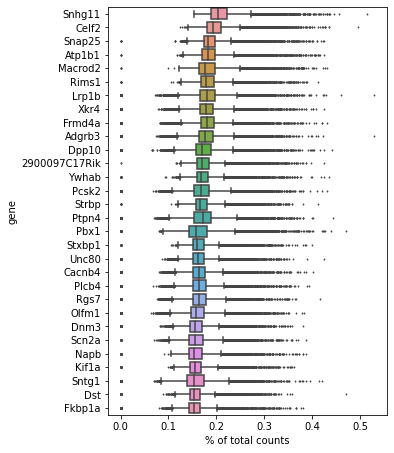

In [49]:
sc.pl.highest_expr_genes(subData)